In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [2]:
data = pd.read_csv('../output/data/Casen2022.csv')
data

,sexo,edad,edad_tr,sexo_edad,educa,region,ingreso,prom_ing_educa,prom_ing_educa_sexo_edad,prom_ing_educa_sexo_edad_region,prom_ing_region,prom_ing_sexo_edad_region,prom_ing_educa_region,prom_ing_sexo_edad,prom_ing_sexo_educa
0,Mujer,40,Adultos,Mujer adulta,Técnica completa,Región de Ñuble,-88.0,623753,586530,519982,498887,463221,508573,596637,527335
1,Hombre,64,Adultos,Hombre adulto,Educación Basica,Región de Ñuble,580000.0,389289,434232,393917,498887,550097,349879,758780,426287
2,Hombre,34,Jovenes,Hombre joven,Educación Media,Región de Ñuble,520000.0,480971,499938,445293,498887,493621,427537,646012,537301
3,Mujer,30,Jovenes,Mujer joven,Educación Media,Región de Ñuble,450000.0,480971,385639,329008,498887,479950,427537,566709,398288
4,Mujer,68,Adultos mayores,Mujer mayor,Educación Media,Región de Ñuble,160000.0,480971,385133,273333,498887,282995,427537,495912,398288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61279,Hombre,28,Jovenes,Hombre joven,Otro nivel educativo,Región de Valparaíso,1300000.0,571852,573905,457602,589113,583309,493202,646012,621323
61280,Mujer,47,Adultos,Mujer adulta,Universitaria completa,Región de La Araucanía,1200000.0,1105064,1134316,925122,506308,488095,875614,596637,967201
61281,Mujer,41,Adultos,Mujer adulta,Universitaria completa,Región de La Araucanía,1400000.0,1105064,1134316,925122,506308,488095,875614,596637,967201
61282,Hombre,46,Adultos,Hombre adulto,Universitaria completa,Región de La Araucanía,2000000.0,1105064,1553697,1150456,506308,551729,875614,758780,1273301


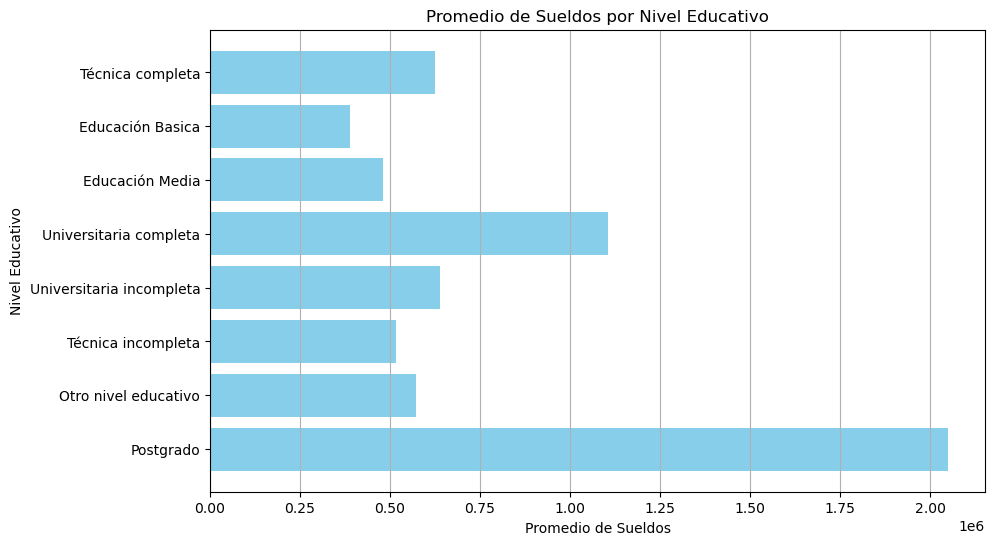

In [3]:
tabla = data.drop_duplicates(subset=['prom_ing_educa', 'sexo_edad', 'educa', 'prom_ing_educa_sexo_edad', 'prom_ing_sexo_educa'])

plt.figure(figsize=(10, 6))
plt.barh(tabla['educa'], tabla['prom_ing_educa'], color='skyblue')
plt.xlabel('Promedio de Sueldos')
plt.ylabel('Nivel Educativo')
plt.title('Promedio de Sueldos por Nivel Educativo')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

C:\Users\criqu\AppData\Local\Temp\ipykernel_28340\1408062517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['grupo'] = tabla['sexo_edad'] + ' - ' + tabla['educa']


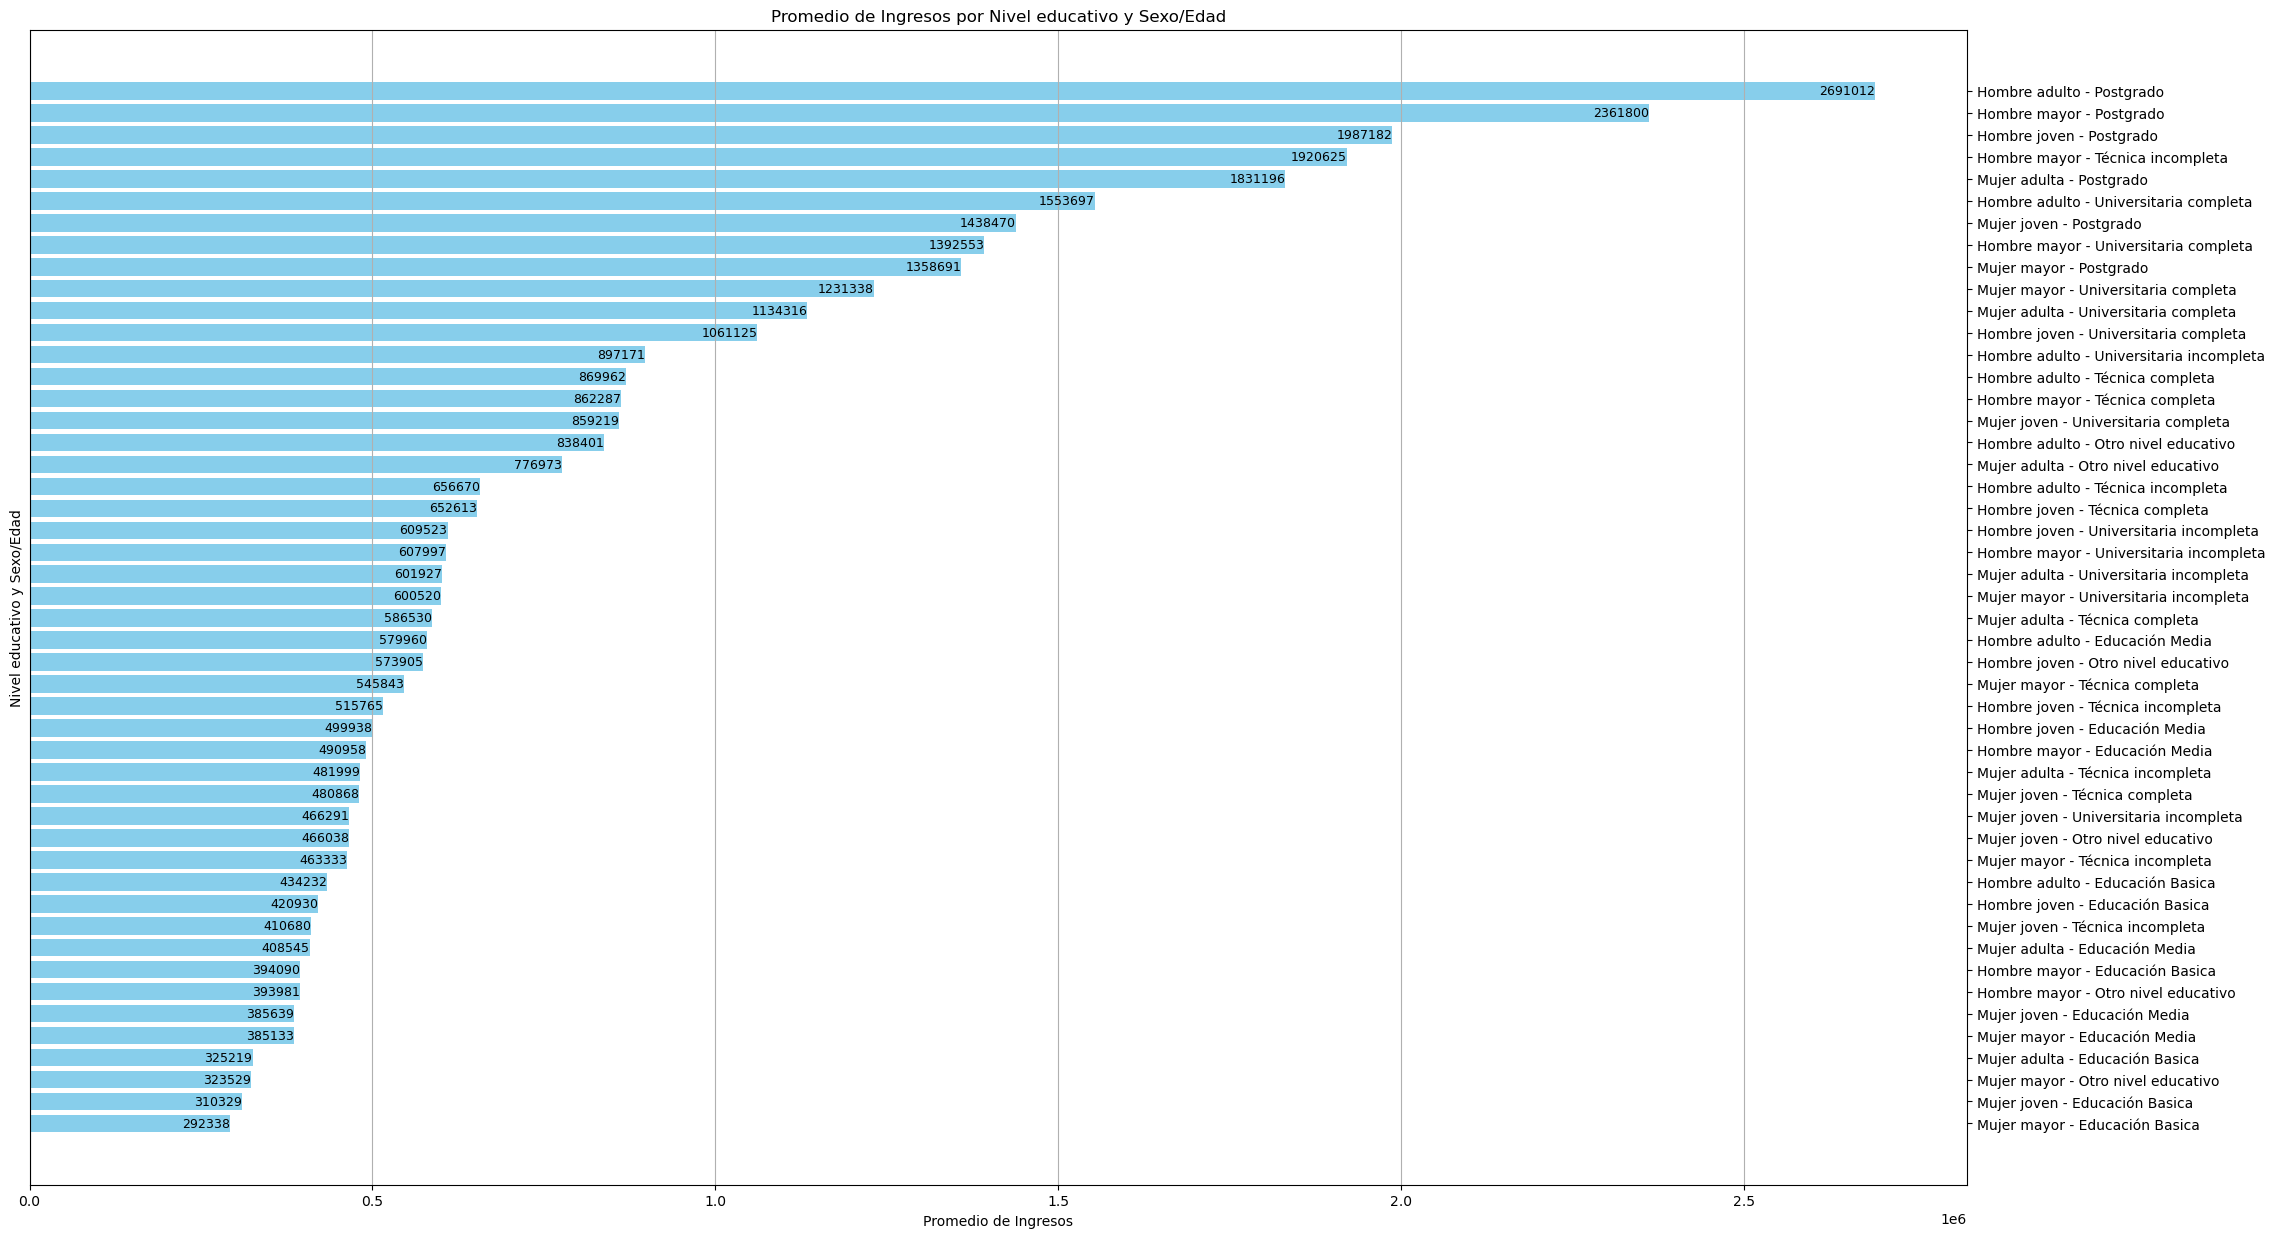

In [4]:
tabla['grupo'] = tabla['sexo_edad'] + ' - ' + tabla['educa']
tabla1 = tabla.sort_values(by='prom_ing_educa_sexo_edad', ascending=False)

plt.figure(figsize=(25, 15))
plt.barh(tabla1['grupo'], tabla1['prom_ing_educa_sexo_edad'], color='skyblue')
for index, value in enumerate(tabla1['prom_ing_educa_sexo_edad']):
    plt.text(value, index, str(value), ha='right', va='center', fontsize=9, color='black')
plt.xlabel('Promedio de Ingresos')
plt.ylabel('Nivel educativo y Sexo/Edad')
plt.title('Promedio de Ingresos por Nivel educativo y Sexo/Edad')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.gca().yaxis.tick_right()
plt.savefig('asd.pdf')
plt.show()

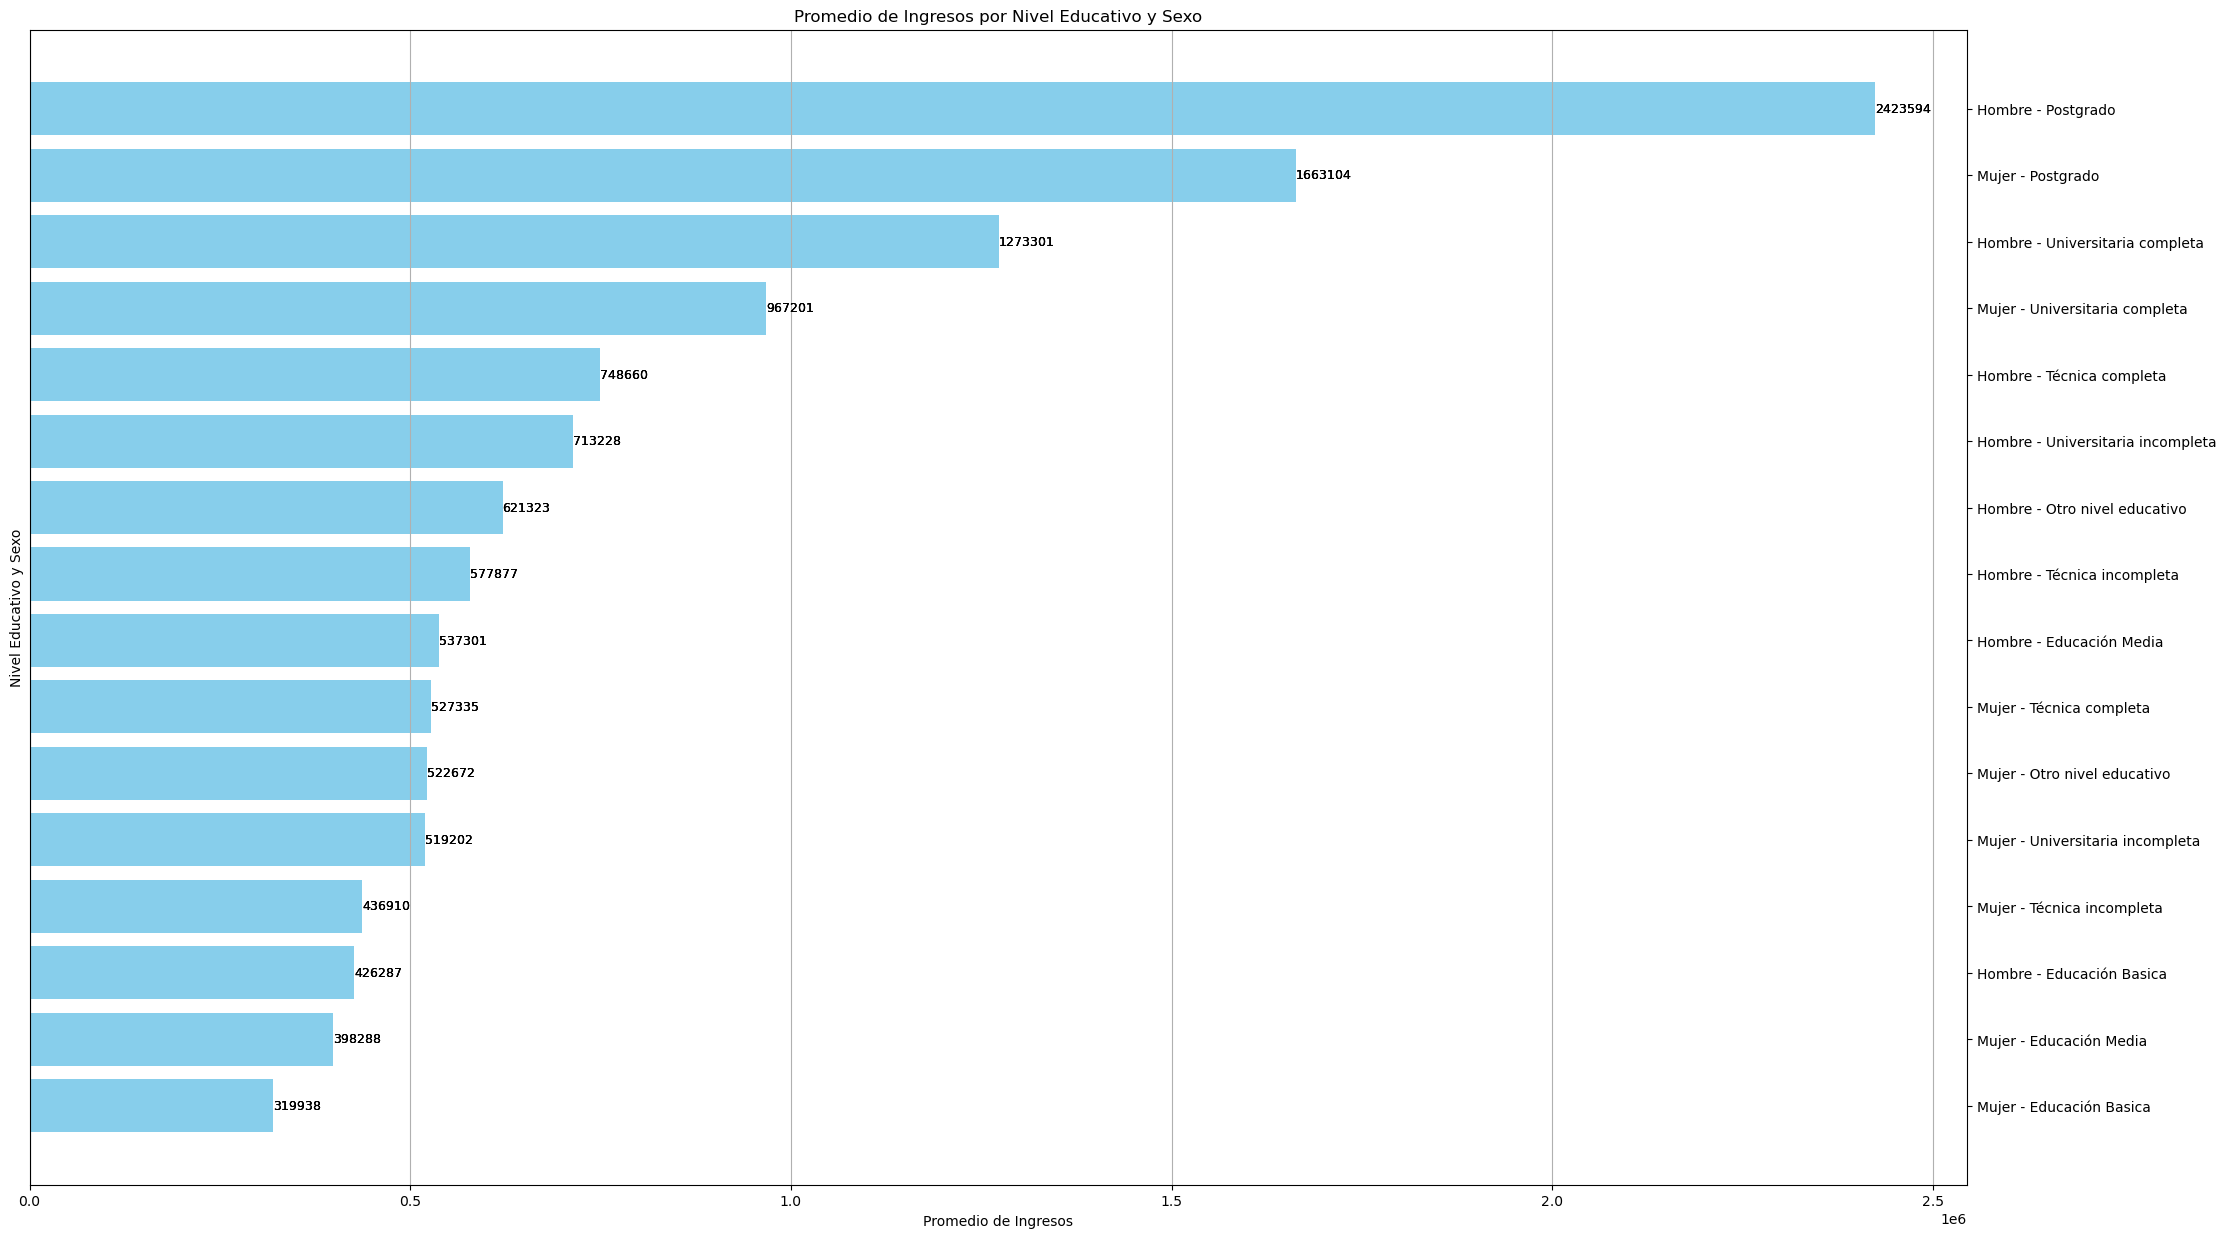

In [5]:
# Eliminar filas duplicadas en función de las columnas especificadas
tabla = tabla.drop_duplicates(subset=['prom_ing_educa', 'sexo_edad', 'educa', 'prom_ing_educa_sexo_edad', 'prom_ing_sexo_educa'])

# Crear una nueva columna 'grupo' combinando 'sexo' y 'educa'
tabla['grupo'] = tabla['sexo'] + ' - ' + tabla['educa']

# Ordenar el DataFrame por 'prom_ing_sexo_educa' de forma descendente
tabla1 = tabla.sort_values(by='prom_ing_sexo_educa', ascending=False)

# Crear el gráfico de barras ordenado
plt.figure(figsize=(25, 15))
bars = plt.barh(tabla1['grupo'], tabla1['prom_ing_sexo_educa'], color='skyblue')

# Añadir etiquetas de texto para cada barra
for bar, value in zip(bars, tabla1['prom_ing_sexo_educa']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.0f}', 
             va='center', ha='left', fontsize=9, color='black')

plt.xlabel('Promedio de Ingresos')
plt.ylabel('Nivel Educativo y Sexo')
plt.title('Promedio de Ingresos por Nivel Educativo y Sexo')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.gca().yaxis.tick_right()
plt.savefig('dsa.pdf')
plt.show()

In [6]:
data['prom_ing_sexo_educa'].value_counts()

prom_ing_sexo_educa
537301     16033
398288     10923
967201      6403
426287      5346
1273301     5247
527335      3661
319938      2852
748660      2826
522672      2049
621323      2037
713228       962
577877       646
519202       612
2423594      609
1663104      588
436910       490
Name: count, dtype: int64